In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from spectral_analysis_utils import constructTransmat, circulant_perturbation, discrete_fourier_transform, circulantEvec, circulant_perturbation, theoretical_circulant_perturbation

%matplotlib inline

/Users/changminyu/miniconda3/envs/cyu_arm/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/6b/58_qt7d91c96pg2b8nn3nd2m0000gn/T/ipykernel_98798/1987020495.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  inset_ax3.plot(V_t, 'r-', color='#009FB9', label='V', linewidth=5)
/var/folders/6b/58_qt7d91c96pg2b8nn3nd2m0000gn/T/ipykernel_98798/1987020495.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar1.set_ticklabels([0, 20, 40, 60, 80, 99])
/var/folders/6b/58_qt7d91c96pg2b8nn3nd2m0000gn/T/ipykernel_98798/1987020495.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar2.set_ticklabels([0, 20, 40, 60, 80, 99])


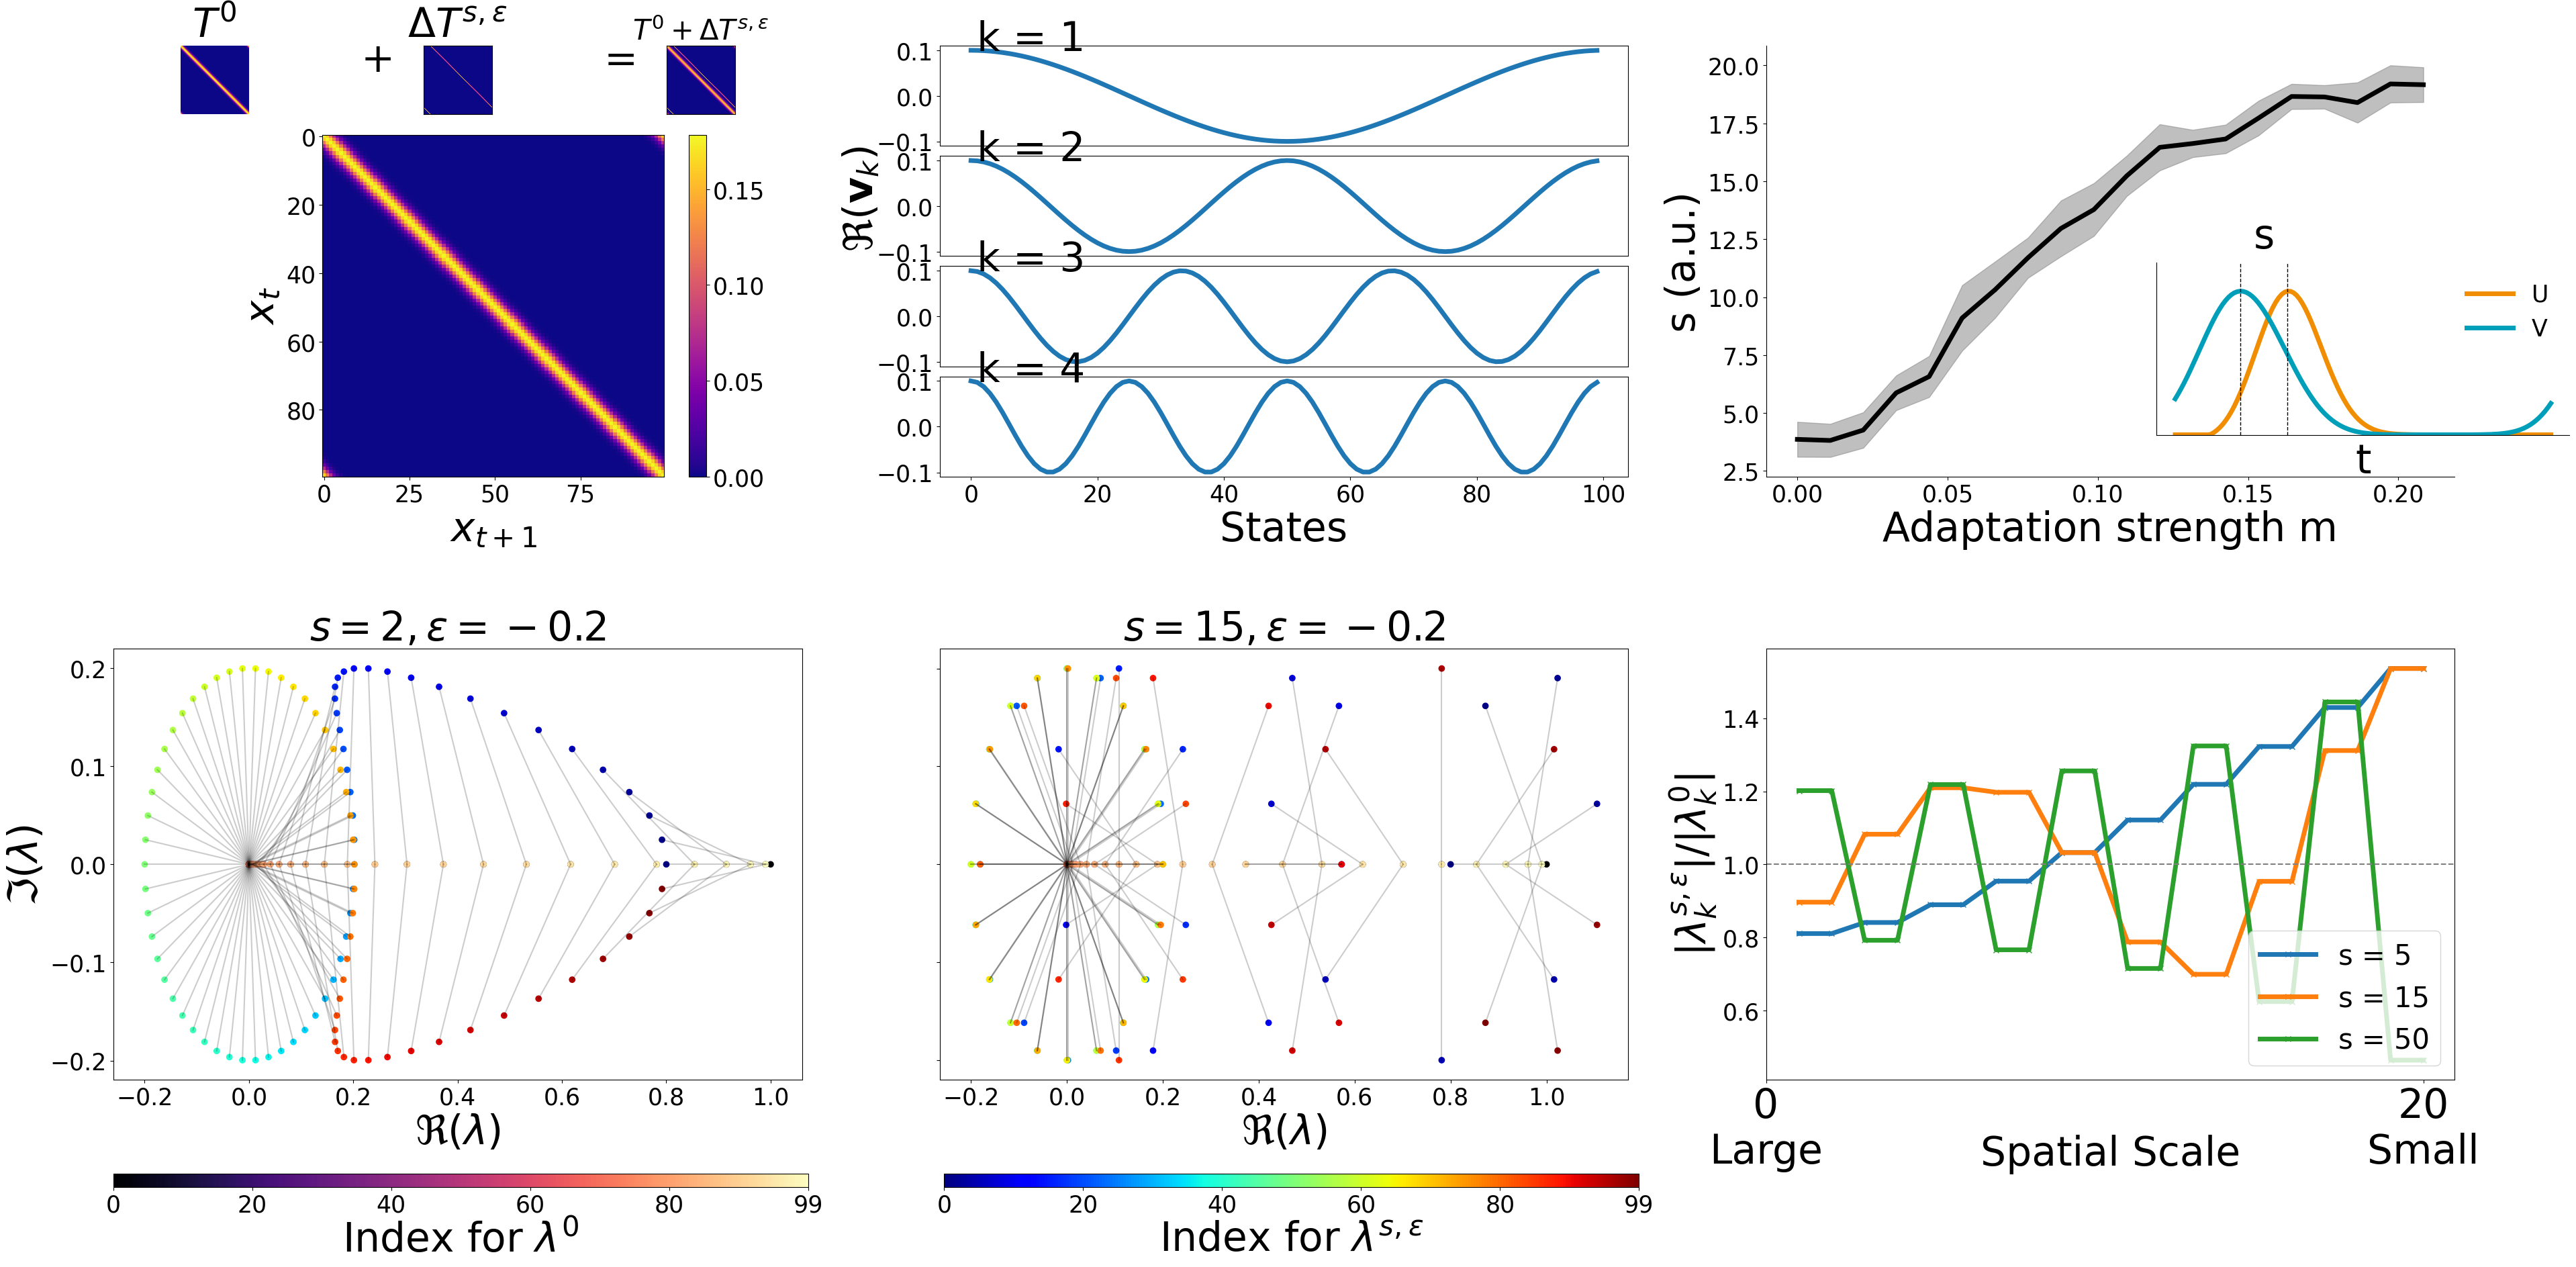

In [5]:
plt.rc('font', size=25)

fig = plt.figure(figsize=(45, 20))
outer_grid = gridspec.GridSpec(2, 3, height_ratios=[1, 1], hspace=0.4)

# panel a
ax1 = plt.Subplot(fig, outer_grid[0, 0])
fig.add_subplot(ax1)
ax1.axis("off")

N = 100
var = 5
T = constructTransmat(N, 1, var)

inner_grid_1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_grid[0, 0], 
                                                height_ratios=[1, 5], hspace=0.1)
inner_grid_1_1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=inner_grid_1[0])
inner_grid_1_ax1 = plt.Subplot(fig, inner_grid_1_1[0])
fig.add_subplot(inner_grid_1_ax1)

inner_grid_1_ax1.imshow(T, cmap="plasma")
inner_grid_1_ax1.axis("off")
inner_grid_1_ax1.set_title(r"$T^{0}$", fontsize="xx-large")

perturbation_matrix = circulant_perturbation(N, 10, eps=0.2)
inner_grid_1_ax2 = plt.Subplot(fig, inner_grid_1_1[1])
fig.add_subplot(inner_grid_1_ax2)

inner_grid_1_ax2.imshow(perturbation_matrix, cmap="plasma")
inner_grid_1_ax2.set_xticks([])
inner_grid_1_ax2.set_yticks([])
inner_grid_1_ax2.set_title(r"$\Delta T^{s, \epsilon}$", fontsize="xx-large")

inner_grid_1_ax2.set_ylabel("+      ", fontsize="xx-large", rotation="horizontal")

inner_grid_1_ax3 = plt.Subplot(fig, inner_grid_1_1[2])
fig.add_subplot(inner_grid_1_ax3)
img_2 = inner_grid_1_ax3.imshow(T + perturbation_matrix, cmap="plasma")
inner_grid_1_ax3.set_xticks([])
inner_grid_1_ax3.set_yticks([])
inner_grid_1_ax3.set_title(r"$T^{0} + \Delta T^{s, \epsilon}$")
inner_grid_1_ax3.set_ylabel("=      ", fontsize="xx-large", rotation="horizontal")

inner_grid_ax2 = plt.Subplot(fig, inner_grid_1[1])
fig.add_subplot(inner_grid_ax2)

im1 = inner_grid_ax2.imshow(T, cmap="plasma")

pos = inner_grid_ax2.get_position()
cbar = fig.colorbar(im1, ax=inner_grid_ax2)
cbar.ax.set_position([pos.x1 + 0.02, pos.y0, 0.02, pos.height])

inner_grid_ax2.set_xlabel(r"$x_{t+1}$", fontsize="xx-large")
inner_grid_ax2.set_ylabel(r"$x_{t}$", fontsize="xx-large")

# panel b
original_evecs = np.array([circulantEvec(N, k) for k in range(N)])

inner_grid_2 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer_grid[0, 1], 
                                                wspace=0.1, hspace=0.1)
for i in range(4):
    ax = plt.Subplot(fig, inner_grid_2[i], label=f"k = {i+1}")
    fig.add_subplot(ax)

    ax.plot(original_evecs[i+1], linewidth=5)
    if i < 3:
        ax.set_xticks([])
    ax.text(0.9, 0.1, f"k = {i+1}", fontsize="xx-large")
ax.set_xlabel("States", fontsize="xx-large")
ax.text(-20.5, .5, r'$\Re(\mathbf{v}_{k})$', va='center', rotation='vertical', fontsize="xx-large")

# panel c
ax3 = plt.Subplot(fig, outer_grid[0, 2])
fig.add_subplot(ax3)

md_data = np.load('../Data/Fig8_m_d.npz')
adaptation_stre = md_data['adaptation_stre']
mean_dp = md_data['mean_dp']
std_dp = md_data['std_dp']

ax3.plot(adaptation_stre, mean_dp, 'o-', markersize=2, color='k', markerfacecolor='k', linewidth=5)
ax3.fill_between(adaptation_stre, mean_dp-std_dp, mean_dp+std_dp, color='gray', alpha=0.5)
ax3.set_xlabel('Adaptation strength m', fontsize="xx-large")
ax3.set_ylabel('s (a.u.)', fontsize="xx-large")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

inset_ax3 = inset_axes(ax3, width='60%', height='40%', loc="lower left", 
                      bbox_to_anchor=(0.55, 0.07, 1, 1), bbox_transform=ax3.transAxes)

UV_data = np.load("../Data/Fig8_U_V.npz")
U_t = UV_data['U_t']
V_t = UV_data['V_t']

U_t = U_t/np.max(U_t)
V_t = V_t/np.max(V_t)

inset_ax3.plot(U_t, '-', color='#F18D00', label='U', linewidth=5)
inset_ax3.plot(V_t, 'r-', color='#009FB9', label='V', linewidth=5)
inset_ax3.legend(frameon=False)
inset_ax3.spines['top'].set_visible(False)
inset_ax3.spines['right'].set_visible(False)
inset_ax3.set_xticks([])
inset_ax3.set_yticks([])
inset_ax3.set_xlabel("t", fontsize="xx-large")

U_peak = np.argmax(U_t)
V_peak = np.argmax(V_t)
inset_ax3.axvline(U_peak, color='k', linestyle='--', linewidth=1)
inset_ax3.axvline(V_peak, color='k', linestyle='--', linewidth=1)

inset_ax3.text((U_peak+V_peak)/2, 1.3, 's', ha='center', fontsize="xx-large")
inset_ax3.set_ylim([0, 1.2])

# panel d
epsilon = -0.2
evals_original = discrete_fourier_transform(T[0])
d_list = [2, 15]
colors = np.arange(N) / (N-1)

inner_grid_4 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[1, :2])

for i in range(2):
    ax = plt.Subplot(fig, inner_grid_4[i])
    fig.add_subplot(ax)
    
    ax.set_title(rf"$s = {d_list[i]}, \epsilon = {epsilon}$", fontsize="xx-large")
    
    evals_perturbed_theoretical = evals_original + theoretical_circulant_perturbation(N, d_list[i], epsilon)
    
    scatter1 = ax.scatter(np.real(evals_original), np.imag(evals_original), c=colors, cmap="magma", label="original")
    scatter2 = ax.scatter(np.real(evals_perturbed_theoretical), np.imag(evals_perturbed_theoretical), c=colors, cmap="jet", label="original")

    for j in range(N):
        ax.plot([np.real(evals_original)[j], np.real(evals_perturbed_theoretical)[j]], [np.imag(evals_original)[j], np.imag(evals_perturbed_theoretical)[j]], 
                   "k-", alpha=0.2)
    
    ax.set_xlabel(r"$\Re(\lambda)$", fontsize="xx-large")
    if i == 0:
        ax.set_ylabel(r"$\Im(\lambda)$", fontsize="xx-large")
    
    ax.set_yticks(np.arange(-0.2, 0.21, 0.1))
    
    if i == 1:
        ax.set_yticklabels([])

# inner_grid_4.update(wspace=0.5)
cbar_ax1 = fig.add_axes([0.125, 0.03, 0.23, 0.01])
cbar_ax2 = fig.add_axes([0.4, 0.03, 0.23, 0.01])

cbar1 = fig.colorbar(scatter1, cax=cbar_ax1, orientation="horizontal")
cbar1.set_label(r'Index for $\lambda^{0}$', fontsize="xx-large")
cbar2 = fig.colorbar(scatter2, cax=cbar_ax2, orientation="horizontal")
cbar2.set_label(r'Index for $\lambda^{s, \epsilon}$', fontsize="xx-large")

cbar1.set_ticklabels([0, 20, 40, 60, 80, 99])
cbar2.set_ticklabels([0, 20, 40, 60, 80, 99])

# panel e
ax5 = plt.Subplot(fig, outer_grid[1, 2])
fig.add_subplot(ax5)

inds = np.argsort(np.abs(evals_original))[::-1]
for d in [5, 15, 50]:
    evals_perturbed_theoretical = evals_original + theoretical_circulant_perturbation(N, d, epsilon)
    ax5.plot(np.arange(1, 21), (np.abs(evals_perturbed_theoretical) / np.abs(evals_original))[inds][1:21], "x-", label=f"s = {d}", 
             linewidth=5)

ax5.legend(fontsize="large")
ax5.set_xticks([0, 20], ["0\nLarge", "20\nSmall"], fontsize="xx-large")
ax5.axhline(1.0, linestyle="--", color="gray")
ax5.set_xlabel("Spatial Scale", labelpad=-40, fontsize="xx-large")
ax5.set_ylabel(r"$|\lambda_{k}^{s, \epsilon}| / |\lambda^{0}_{k}|$", fontsize="xx-large")

# plt.tight_layout()

fig.savefig("../PaperFigs/figure7.pdf", bbox_inches='tight')